# Digital Signal Image Processing Assignment - Aliasing

**Riccardo Caprile 4370774**

Description of the assignment : Consider the function $p_T(t)$ with T sampled uniformly in the interval [1,4].

Starting from the train impulses for two different sampling rates and the corresponding train of impulses in the two cases , derive the temporal sampling rate that the 
distance between two consecutive impulses correspond to a decay of 10% and 1% of the Fourier Transform F($\omega$) with respect to the maximum value.

Comment the type of aliasing you can expect in the two cases.

Explain the reason for which with function like $p_T(t)$ aliasing can be reduced but not completely eliminated

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

# T Uniform Sampling

In [2]:
T = np.random.uniform(1,4)

print(T)

3.785181012650785


In [3]:
delta = 1/1000
t = np.arange(-6, 6, delta)
print("Number of samples: %d"% len(t))

Number of samples: 12000


# Let's build the Rectangle function $p_T(t)$ and plot it

In [4]:
def rectangle(t,T):
    return 1 if t < T and t > -T else 0

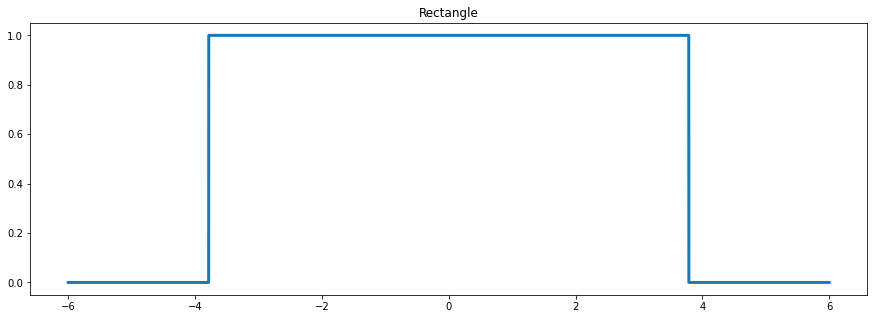

In [5]:
y = np.zeros(len(t))

for i in range(len(t)):
        y[i] = rectangle(t[i], T)
  
plt.plot(t, y, linewidth=3)
plt.title('Rectangle')
plt.show()

# Let's compute the Fourier Transform of the rectangle function

In [6]:
n = len(t) ## number of samples

## array of fft(y)
fft_f = np.fft.fft(y)

## array of frequencies values
freq = np.fft.fftfreq(n, delta)

y_inv = np.fft.ifft(fft_f)

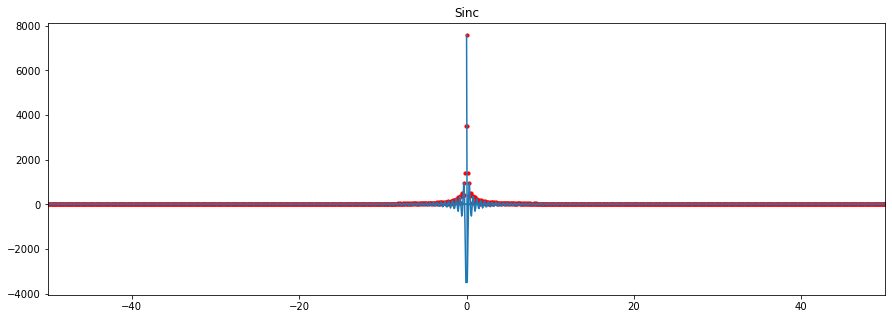

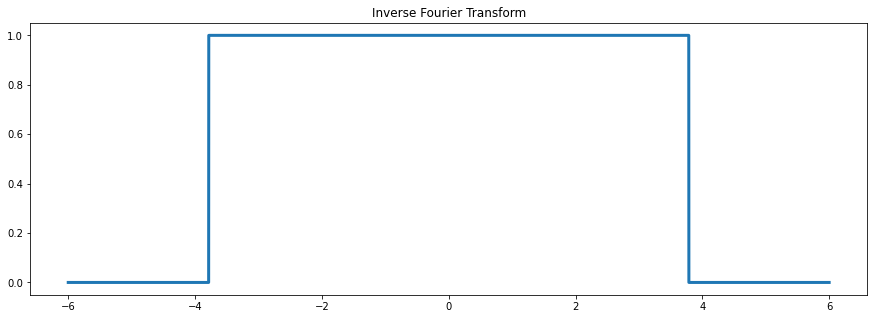

In [7]:
plt.plot(freq, np.real(fft_f))
plt.scatter(freq, np.abs(fft_f),color = "r",s =10)
plt.xlim(-50, 50)
plt.title("Sinc")
plt.show()

plt.plot(t, np.real(y_inv), linewidth=3)
plt.title("Inverse Fourier Transform")
plt.show()

# Train Impulses for two different sampling rates

First case : Train of impulses in the time domain period = 1000

In [8]:
t_period = 1000

train1 = np.zeros_like(t)
train1[::int(t.size/t_period)] = 1 #there is an impulse every t.size/t_period samples

In [9]:
print("We've an impulse every ", int(t.size/t_period) , "samples ")

We've an impulse every  12 samples 


Let's plot the train of impulses in the time domain

Firstly , we visualize a small part of the train. In this way we can have a clear idea how the train is.

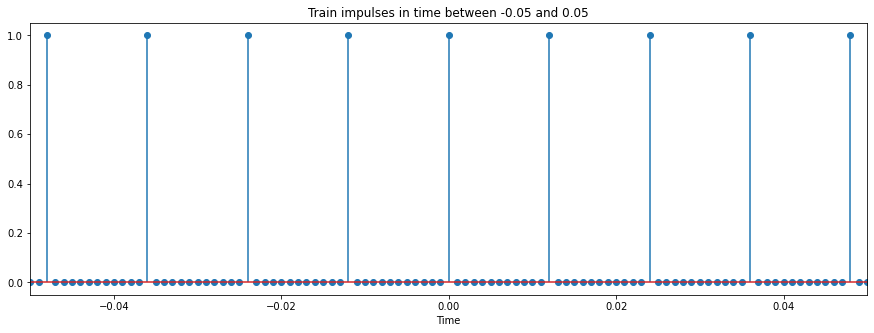

In [10]:
plt.stem(t,train1)
plt.xlim(-0.05,0.05)
plt.xlabel("Time")
plt.title("Train impulses in time between -0.05 and 0.05")
plt.show()

Then we visualize the entire train of impulses 

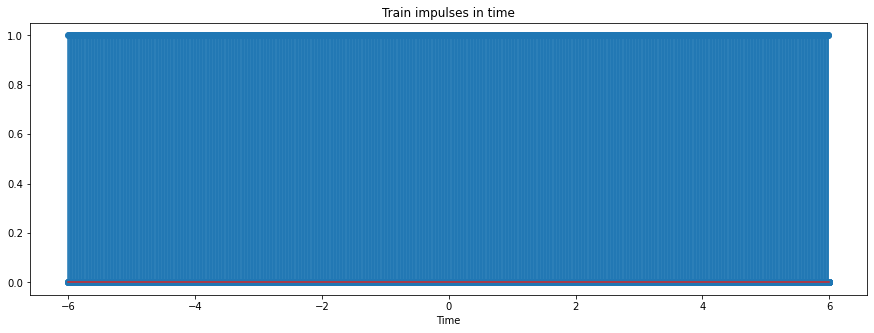

In [11]:
plt.stem(t,train1)
plt.xlabel("Time")
plt.title("Train impulses in time")
plt.show()

**Let's now build the train of impulses in the freequency domain**

In [12]:
train1_fft = np.fft.fft(train1)

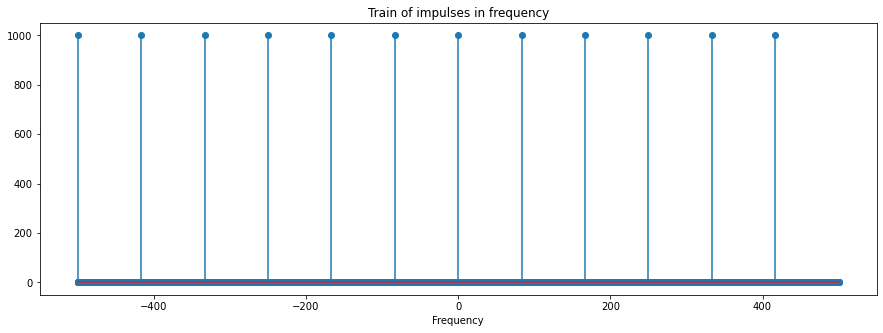

In [13]:
plt.stem(freq, np.real(train1_fft))
plt.title('Train of impulses in frequency')
plt.xlabel("Frequency")
plt.show()

-------------------------------------------

Second case : Train of impulses in the time domain period = 200

Let's follow the same steps seen before

In [14]:
t_period = 200

train2 = np.zeros_like(t)
train2[::int(t.size/t_period)] = 1 #there is an impulse every t.size/t_period samples

In [15]:
print("We've an impulse every ", int(t.size/t_period) , "samples ")

We've an impulse every  60 samples 


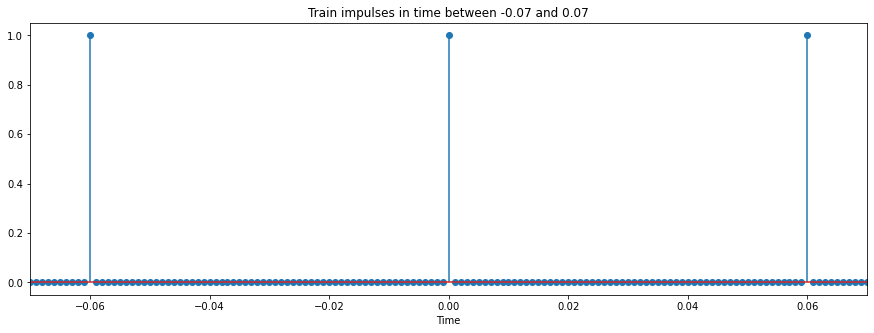

In [16]:
plt.stem(t,train2)
plt.xlim(-0.07,0.07)
plt.xlabel("Time")
plt.title("Train impulses in time between -0.07 and 0.07")
plt.show()

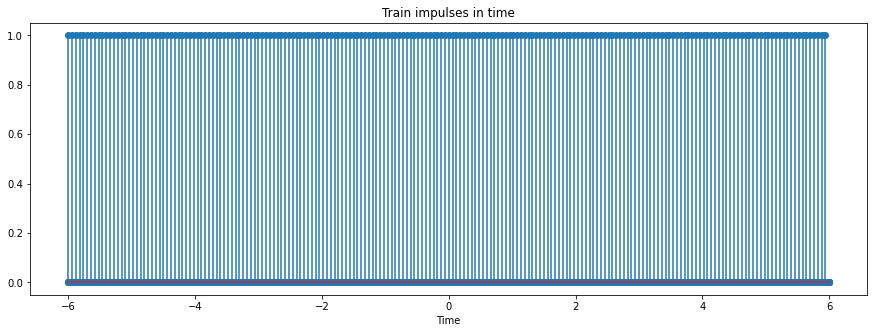

In [17]:
plt.stem(t,train2)
plt.xlabel("Time")
plt.title("Train impulses in time")
plt.show()

In [18]:
train2_fft = np.fft.fft(train2)

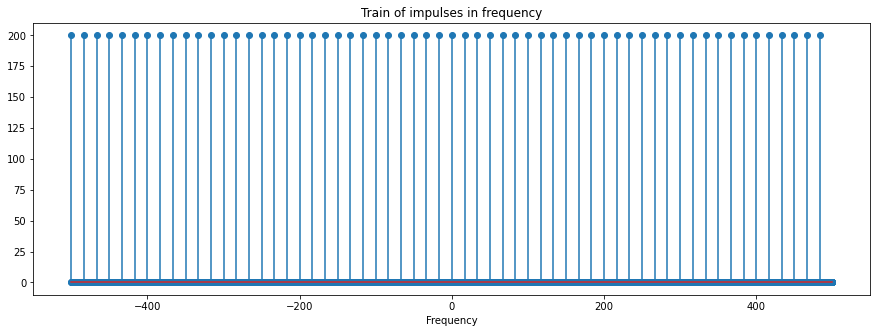

In [19]:
plt.stem(freq, np.real(train2_fft))
plt.title('Train of impulses in frequency')
plt.xlabel("Frequency")
plt.show()

# Let's sample the Rectangle function $p_T(t)$

I sampled the rectangle function by multiplying the function $p_T(t)$ with the trained of impulses in time domain that i've defined earlier

$S_{smp}(t) = S(t) * i(t)$

We are going to have a train of impulses equal to 1 only in the part of signal equal to 1


**First Case**

In [20]:
smp1 = np.zeros(len(t))
smp1 = y * train1

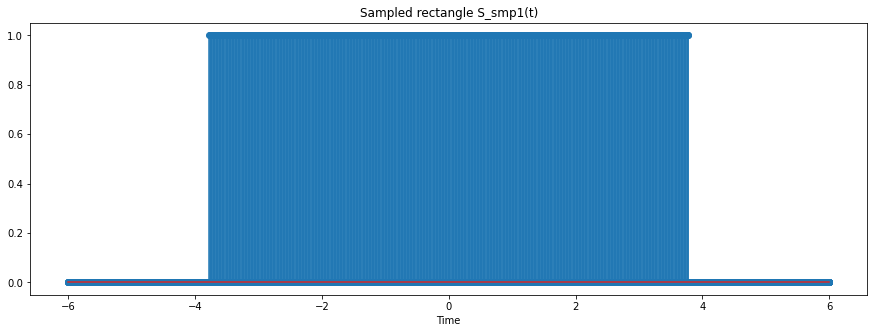

In [21]:
plt.stem(t, smp1)
plt.title('Sampled rectangle S_smp1(t)')
plt.xlabel("Time")
plt.show()

**Second Case**

It is easy to see that the number of impulses is different

In [22]:
smp2 = np.zeros(len(t))
smp2 = y * train2

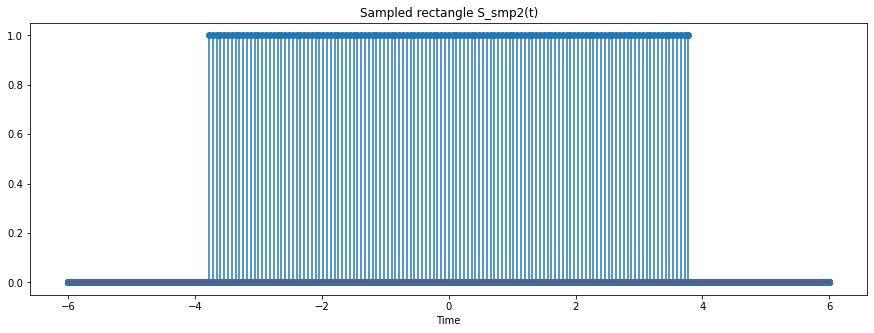

In [23]:
plt.stem(t, smp2)
plt.title('Sampled rectangle S_smp2(t)')
plt.xlabel("Time")
plt.show()

# Let's compute the Fourier Transform of $S_{smp1}(t)$

I've computed the Fourier Transform of the sampled signals $smp_1$ and $smp_2$ for getting $S_{smp1}(\omega)$.

This signal represents the sum of equidistant copies of $S(\omega)$ , each one centered in $1/T_c$

In [24]:
fft_smp1 = np.fft.fft(smp1)

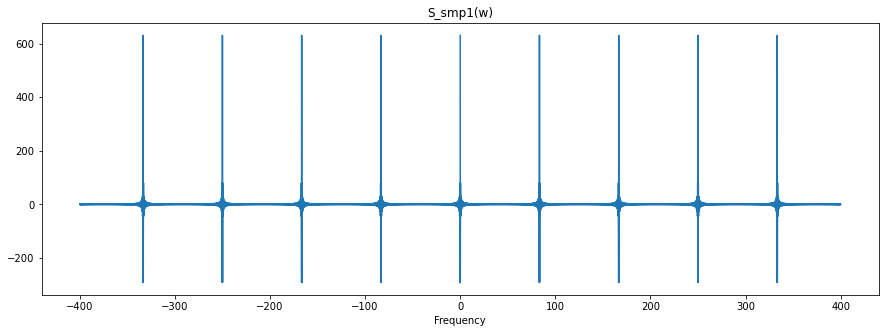

In [25]:
low_freq = -400
high_freq = 400

#index of the desired frequency
idx = np.where((freq >= low_freq) & (freq <= high_freq))

plt.plot(freq[idx], np.real(fft_smp1[idx]))
plt.title("S_smp1(w)")
plt.xlabel("Frequency")
plt.show()

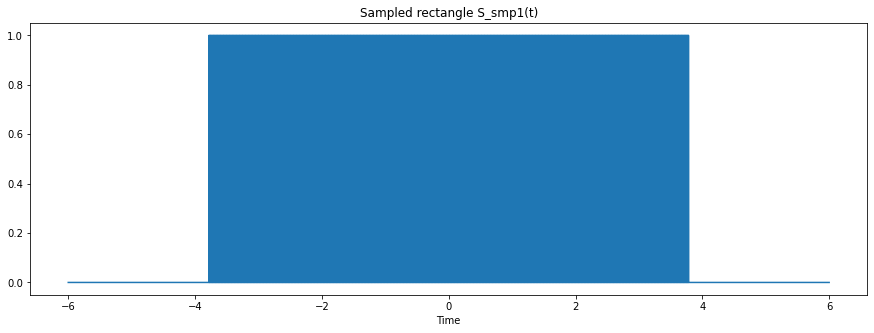

In [26]:
fft_inv_smp1 = np.fft.ifft(fft_smp1)
plt.plot(t, np.real(fft_inv_smp1))
plt.title("Sampled rectangle S_smp1(t)")
plt.xlabel("Time")
plt.show()

# Let's compute the Fourier Transform of $S_{smp2}(t)$

In [27]:
fft_smp2 = np.fft.fft(smp2)

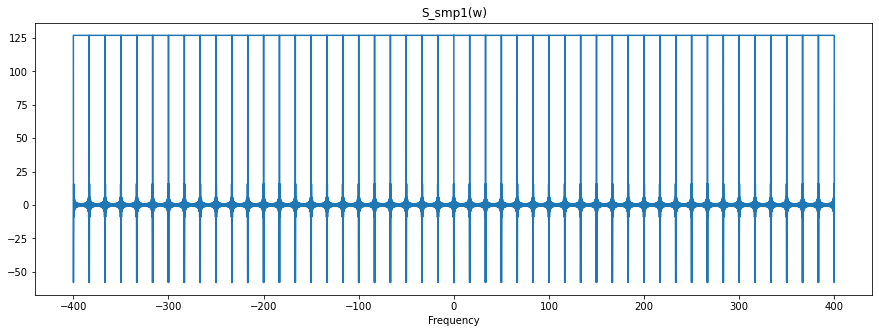

In [28]:
low_freq = -400
high_freq = 400

#index of the desired frequency
idx = np.where((freq >= low_freq) & (freq <= high_freq))

plt.plot(freq[idx], np.real(fft_smp2[idx]))
plt.title("S_smp1(w)")
plt.xlabel("Frequency")
plt.show()

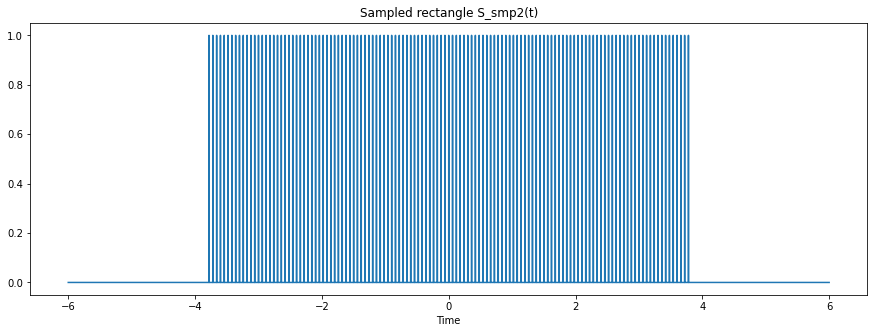

In [29]:
fft_inv_smp2 = np.fft.ifft(fft_smp2)



plt.plot(t, np.real(fft_inv_smp2))
plt.title("Sampled rectangle S_smp2(t)")
plt.xlabel("Time")
plt.show()